In [ ]:
import pandas as pd

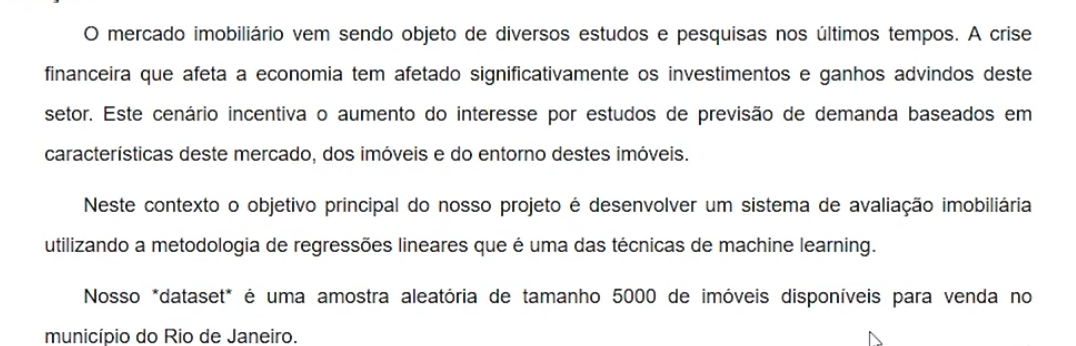

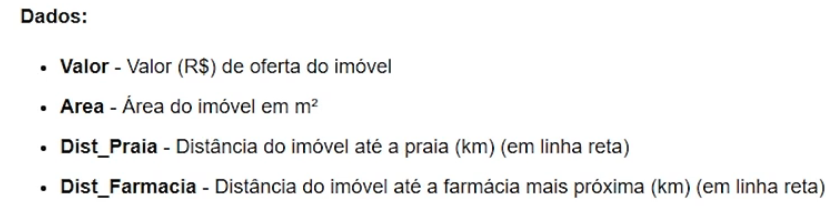

In [ ]:
dados = pd.read_csv('dataset.csv', sep = ';')

In [ ]:
dados.head()

,Valor,Area,Dist_Praia,Dist_Farmacia
0,4600000,280,0.240925,0.793637
1,900000,208,0.904136,0.134494
2,2550000,170,0.059525,0.423318
3,550000,100,2.883181,0.525064
4,2200000,164,0.239758,0.192374


In [ ]:
dados.shape

(5000, 4)

In [ ]:
dados.size

20000

# Estatísticas Descritivas

In [ ]:
dados.describe().round(2)

,Valor,Area,Dist_Praia,Dist_Farmacia
count,5000.00,5000.00,5000.00,5000.00
mean,1402926.39,121.94,3.02,0.50
std,1883268.85,90.54,3.17,0.29
min,75000.00,16.00,0.00,0.00
25%,460000.00,70.00,0.44,0.24
50%,820000.00,93.00,1.48,0.50
75%,1590000.00,146.00,5.61,0.75
max,25000000.00,2000.00,17.96,1.00


# Matriz de Correlação

In [ ]:
dados.corr().round(4)

,Valor,Area,Dist_Praia,Dist_Farmacia
Valor,1.0000,0.7110,-0.3665,-0.0244
Area,0.7110,1.0000,-0.2834,-0.0310
Dist_Praia,-0.3665,-0.2834,1.0000,0.0256
Dist_Farmacia,-0.0244,-0.0310,0.0256,1.0000


# Análises Gráficas

In [ ]:
import seaborn as sns

In [ ]:
sns.set_palette('Accent')

sns.set_style('darkgrid')

<Axes: title={'center': 'Preço dos Imóveis'}, xlabel='Reais'>

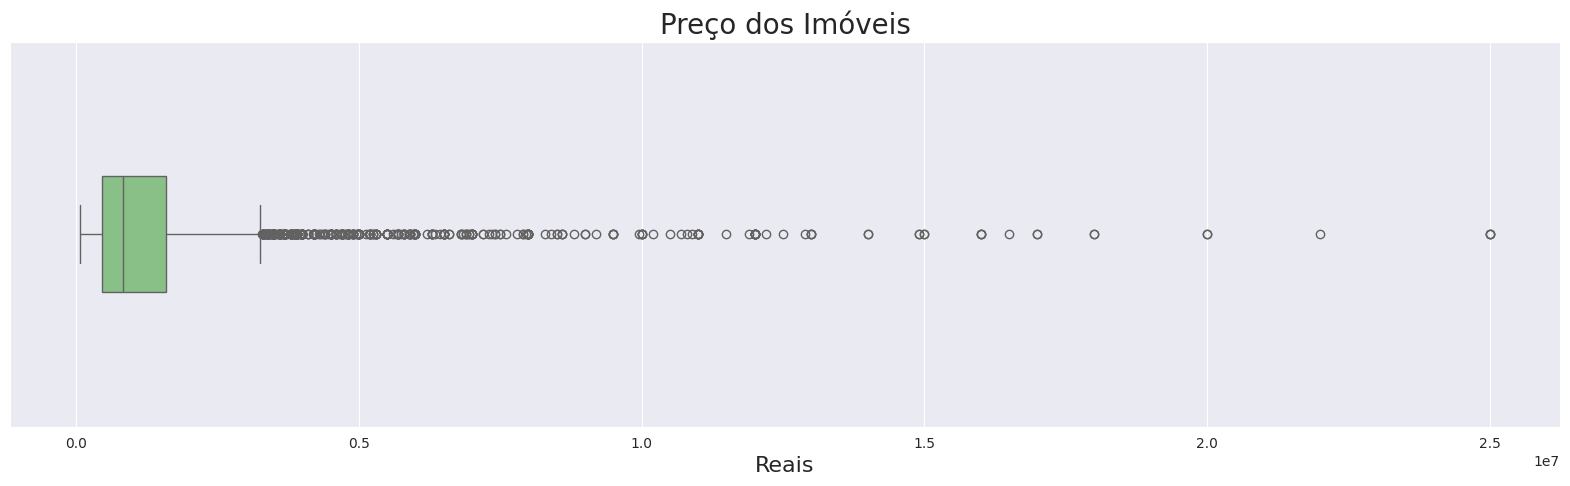

In [ ]:
ax = sns.boxplot(data = dados['Valor'], orient ='h', width = 0.3)
ax.figure.set_size_inches(20, 5)
ax.set_title('Preço dos Imóveis', fontsize = 20)
ax.set_xlabel('Reais', fontsize = 16)
ax

## Distribuição de frequências


<ipython-input-12-1423ae59ea12>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dados['Valor'])


<Axes: title={'center': 'Distribuição de Frequências'}, xlabel='Preço dos Imóveis', ylabel='Density'>

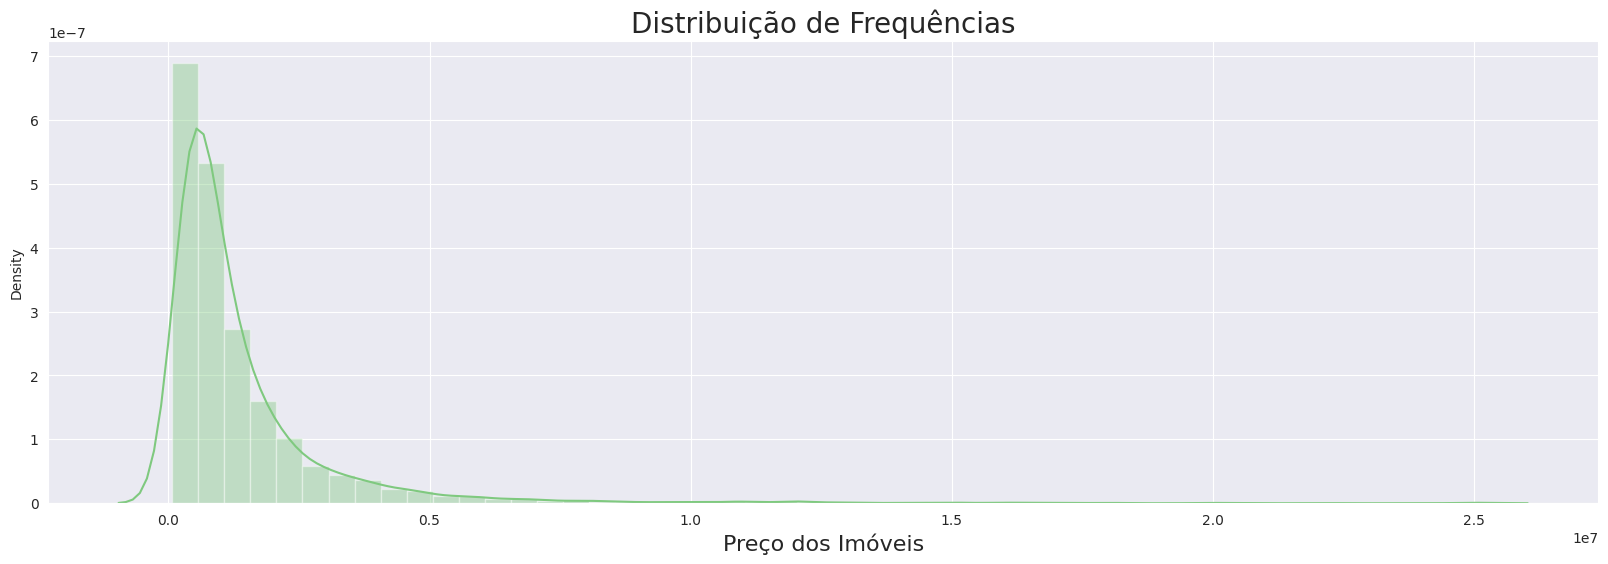

In [ ]:
ax = sns.distplot(dados['Valor'])
ax.figure.set_size_inches(20, 6)
ax.set_title('Distribuição de Frequências', fontsize = 20)
ax.set_xlabel('Preço dos Imóveis', fontsize = 16)
ax

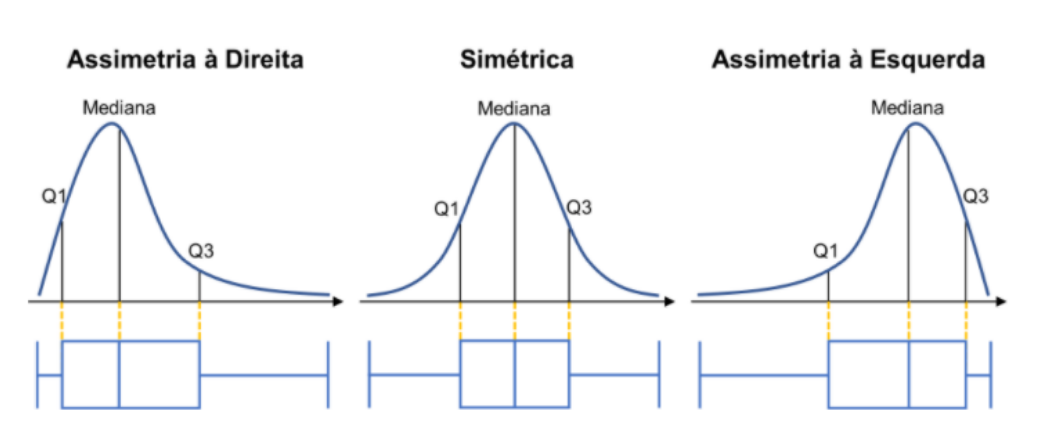

## Dispersão Entre as Variáveis


Gráficos de dispersão permitem identificar o relacionamento entre duas variáveis

É possível traçar uma reta de regressão entre duas variáveis, utilizando a função pairplot(), do seaborn

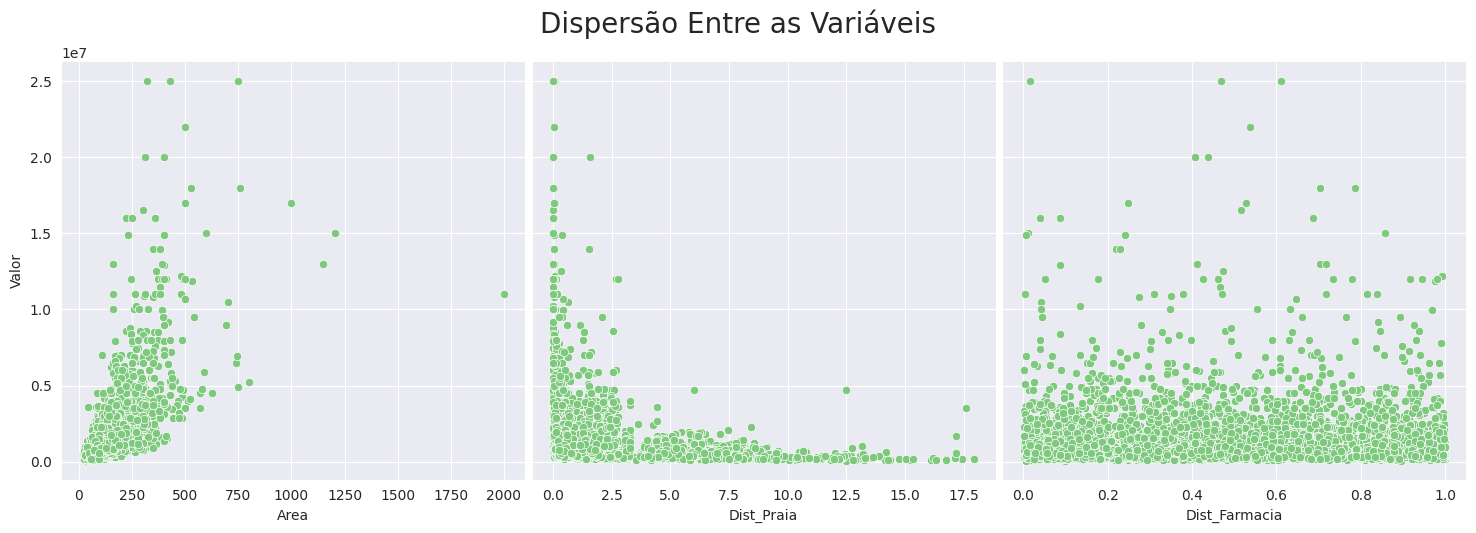

In [ ]:
ax = sns.pairplot(dados, y_vars = 'Valor', x_vars = ['Area', 'Dist_Praia', 'Dist_Farmacia'], height = 5)
ax.figure.suptitle('Dispersão Entre as Variáveis', fontsize = 20, y = 1.05)
ax

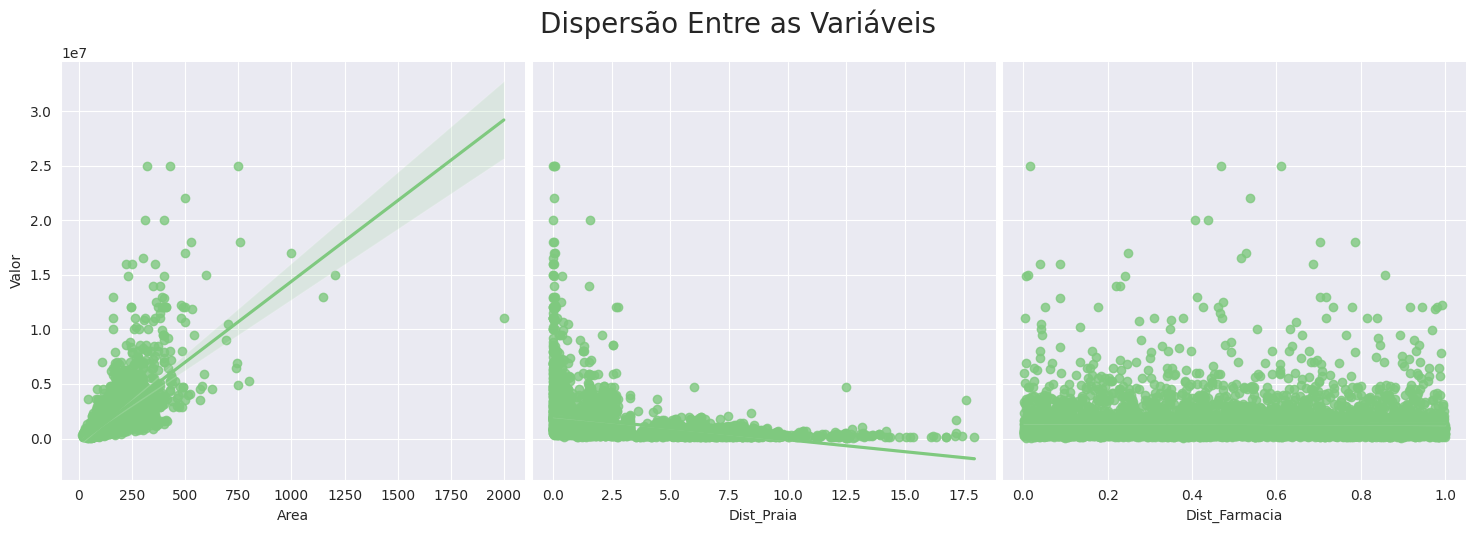

In [ ]:
ax = sns.pairplot(dados, y_vars = 'Valor', x_vars = ['Area', 'Dist_Praia', 'Dist_Farmacia'], kind = 'reg', height = 5)
ax.figure.suptitle('Dispersão Entre as Variáveis', fontsize = 20, y = 1.05)
ax

#Transformando os dados


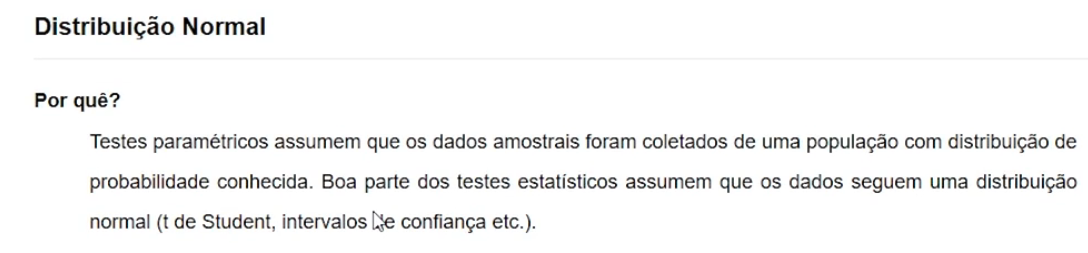

In [ ]:
import numpy as np

###Aplicando a transformação Logarítmica


Um dos principais motivos de se transformar alguns tipos de dados é para tentar corrigir a assimetria que tais informações apresentam quando observadas em nível.

Como a variável apresenta valores zero em alguns registros, a forma mais correta de transformação é adicionando uma constante, diferente de zero, aos dados, para evitar perda de informação, visto que log(0) não existe.

In [ ]:
np.log(0)

<ipython-input-16-f6e7c0610b57>:1: RuntimeWarning: divide by zero encountered in log
  np.log(0)


-inf

In [ ]:
dados['log_Valor'] = np.log(dados['Valor'])
dados['log_Area'] = np.log(dados['Area'])
dados['log_Dist_Praia'] = np.log(dados['Dist_Praia'] + 1)  # +1 para evitar log(0)
dados['log_Dist_Farmacia'] = np.log(dados['Dist_Farmacia'] + 1)

In [ ]:
dados.head()

,Valor,Area,Dist_Praia,Dist_Farmacia,log_Valor,log_Area,log_Dist_Praia,log_Dist_Farmacia
0,4600000,280,0.240925,0.793637,15.341567,5.634790,0.215857,0.584245
1,900000,208,0.904136,0.134494,13.710150,5.337538,0.644028,0.126187
2,2550000,170,0.059525,0.423318,14.751604,5.135798,0.057821,0.352991
3,550000,100,2.883181,0.525064,13.217674,4.605170,1.356655,0.422036
4,2200000,164,0.239758,0.192374,14.603968,5.099866,0.214916,0.175946


###Distribuição de Frequência com os dados transformados

<ipython-input-19-623bed1d2700>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dados['log_Valor'])


<Axes: title={'center': 'Distribuição de Frequências'}, xlabel='log do preço dos Imóveis', ylabel='Density'>

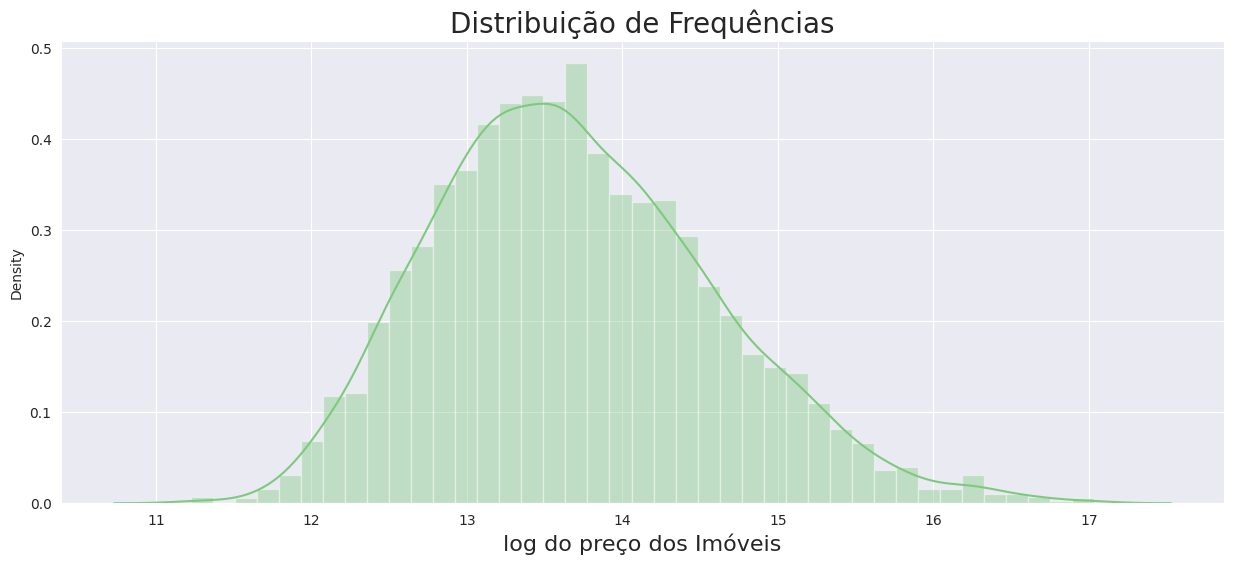

In [ ]:
ax = sns.distplot(dados['log_Valor'])
ax.figure.set_size_inches(15, 6)
ax.set_title('Distribuição de Frequências', fontsize = 20)
ax.set_xlabel('log do preço dos Imóveis', fontsize = 16)
ax

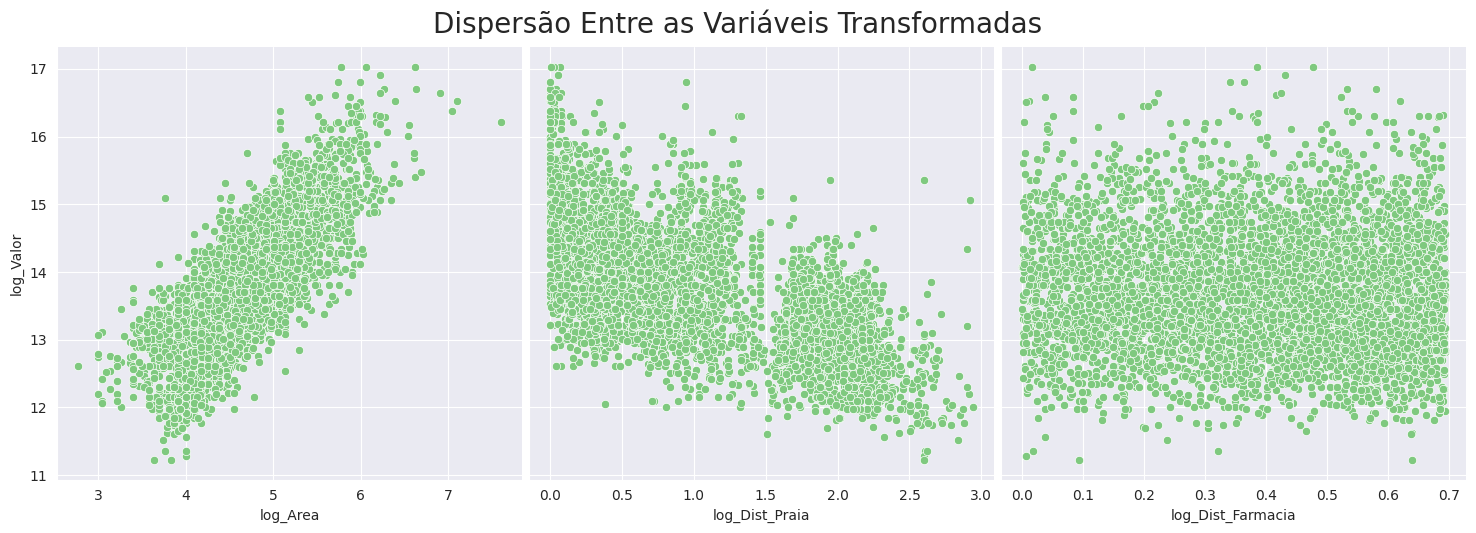

In [ ]:
ax = sns.pairplot(dados, y_vars = 'log_Valor', x_vars = ['log_Area', 'log_Dist_Praia', 'log_Dist_Farmacia'], height = 5)
ax.figure.suptitle('Dispersão Entre as Variáveis Transformadas', fontsize = 20, y = 1.05)
ax

##Estimação

###Criando os datasets de treino e teste


### Trabalhando com StatsM

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
y = dados['log_Valor']

In [ ]:
X = dados[['log_Area', 'log_Dist_Praia', 'log_Dist_Farmacia']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2811)

### Trabalhando com StatsModels


O statsmodels é um módulo Python que fornece classes e funções para a estimativa de muitos modelos estatísticos diferentes, bem como para a realização de testes estatísticos e exploração de dados.

In [ ]:
import statsmodels.api as sm

In [ ]:
X_train_com_constante = sm.add_constant(X_train)

In [ ]:
X_train_com_constante ## criando um novo X_train com constante

,const,log_Area,log_Dist_Praia,log_Dist_Farmacia
2661,1.0,5.945421,0.000000,0.382273
912,1.0,3.135494,0.972865,0.605015
3042,1.0,4.317488,1.794961,0.486594
141,1.0,3.401197,0.310455,0.599609
3854,1.0,5.676754,0.032193,0.101903
...,...,...,...,...
3657,1.0,5.075174,2.023480,0.333605
979,1.0,4.174387,2.296141,0.156465
2389,1.0,4.394449,1.367741,0.409727
447,1.0,3.951244,2.166841,0.217381


In [ ]:
modelo_statsmodels = sm.OLS(y_train, X_train_com_constante, hasconst = True).fit() ## criando o modelo OLS

###Avaliando o modelo estimado


In [ ]:
print(modelo_statsmodels.summary())

                            OLS Regression Results                            
Dep. Variable:              log_Valor   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     5495.
Date:                Tue, 23 Jul 2024   Prob (F-statistic):               0.00
Time:                        14:52:36   Log-Likelihood:                -2044.9
No. Observations:                4000   AIC:                             4098.
Df Residuals:                    3996   BIC:                             4123.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 9.3417      0.06

Vamos retirar Dist_Farmacia, pois mostrou-se pelo pvalor que é insignificante para o modelo.

##Modificando o modelo

In [ ]:
X = dados[['log_Area', 'log_Dist_Praia']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2811)

In [ ]:
X_train_com_constante = sm.add_constant(X_train)

In [ ]:
modelo_statsmodels = sm.OLS(y_train, X_train_com_constante, hasconst = True).fit()

In [ ]:
print(modelo_statsmodels.summary())

                            OLS Regression Results                            
Dep. Variable:              log_Valor   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     8244.
Date:                Tue, 23 Jul 2024   Prob (F-statistic):               0.00
Time:                        14:52:36   Log-Likelihood:                -2045.1
No. Observations:                4000   AIC:                             4096.
Df Residuals:                    3997   BIC:                             4115.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              9.3349      0.059    158.

# Usando Scikit-Learn

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
modelo = LinearRegression() ## instanciando o modelo

In [ ]:
modelo.fit(X_train, y_train) ## aplicando o modelo nos dados

LinearRegression()

In [ ]:
print('R² = {}'.format(modelo.score(X_train, y_train).round(3))) ## verificando o score R²

R² = 0.805


In [ ]:
y_previsto = modelo.predict(X_test) ## prevendo y usando X_test

In [ ]:
print('R² = %s' % metrics.r2_score(y_test, y_previsto).round(3))

R² = 0.79


##Obtendo Previsões Pontuais


In [ ]:
entrada = X_test[0:1]
entrada

,log_Area,log_Dist_Praia
1006,5.273,1.282769


In [ ]:
modelo.predict(entrada)[0] ## geramos uma previsão pontual, contudo o valor retornado está normalizado (raiz quadrada)

14.284820061847878

In [ ]:
np.exp(modelo.predict(entrada)[0]) ## podemos ver a previsão em reais, exponenciando com numpy

1598889.7847794362

Criando um simulador simples

In [ ]:
Area = 250
Dist_Praia = 1
entrada = [[np.log(Area), np.log(Dist_Praia + 1)]]

print('R$ {0:.2f}'.format(np.exp(modelo.predict(entrada)[0])))

R$ 2777292.84


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### Interpretando os coeficientes estimados

In [ ]:
modelo.intercept_ ## obtendo o intercept do modelo, porém ele retorna normalizado

9.33491640980033

In [ ]:
np.exp(modelo.intercept_) ## intercept real do modelo

11326.681428069862

In [ ]:
X.columns

Index(['log_Area', 'log_Dist_Praia'], dtype='object')

In [ ]:
index = ['Intercepto', 'Log Area (m²)', 'Log Distância até a Praia']

In [ ]:
pd.DataFrame(data = np.append(modelo.intercept_, modelo.coef_), index = index, columns = ['Parâmetros'])

,Parâmetros
Intercepto,9.334916
Log Area (m²),1.058078
Log Distância até a Praia,-0.490612


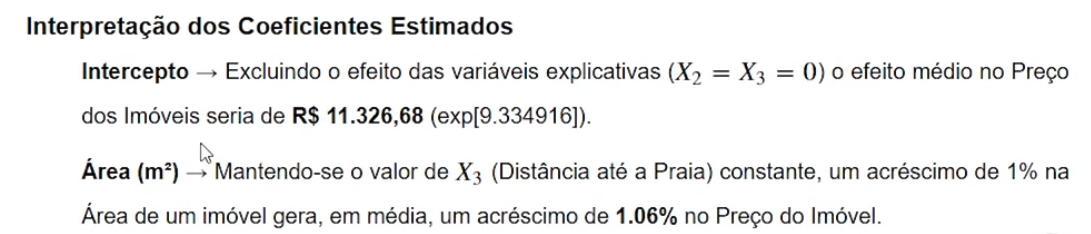

Mantendo-se o valor da distância até a praia constante, um acréscimo de 1% na área de um imóvel gera, em média, um acréscimo de 1.06% no preço do imóvel.

Mantendo-se o valor da área constante, um acréscimo de 1% na distância de um imóvel até a praia gera, em média, um decréscimo de 0.49% no preço do imóvel.

Intercepto = Excluindo o efeito das variáveis explicativas (área e distância até a praia), o efeito médio no preço dos imóveis seria de R$ 11.326,68 (exp[9.334916]).

#Análises gráficas dos resultados do modelo

In [ ]:
y_previsto_train = modelo.predict(X_train)

<Axes: title={'center': 'Previsão X Real'}, xlabel='log do Preço - Previsão', ylabel='log do Preço - Real'>

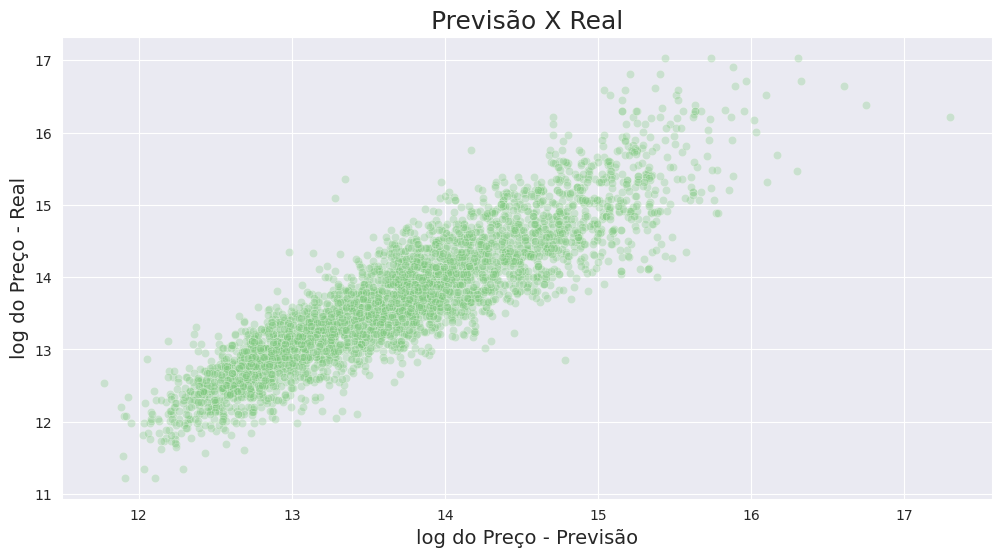

In [ ]:
ax = sns.scatterplot(x = y_previsto_train, y = y_train, alpha = 0.3)
ax.figure.set_size_inches(12, 6)
ax.set_title('Previsão X Real', fontsize = 18)
ax.set_xlabel('log do Preço - Previsão', fontsize = 14)
ax.set_ylabel('log do Preço - Real', fontsize = 14)
ax

## Obtendo os Resíduos

Os resíduos do modelo são obtidos através da subtração entre o valor observado da variável dependente (valor real) e o valor previsto pelo modelo

Para plotarmos a distribuição de frequências dos resíduos, podemos utilizar a função distplot(), da biblioteca seaborn

Quando plotamos a dispersão entre o valor real da variável dependente e os valores previstos pelo modelo, esperamos encontrar uma relação linear bem ajustada (reta)

In [ ]:
residuo = y_train - y_previsto_train
residuo

2661    0.632221
912     0.103178
3042   -0.201268
141     0.798452
3854    0.099376
          ...   
3657    0.103408
979     0.222697
2389   -0.232015
447    -0.246490
2008   -0.195782
Name: log_Valor, Length: 4000, dtype: float64

<ipython-input-60-d4b14d560f6e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(residuo)


<Axes: title={'center': 'Distribuição de Frequência dos Residuos'}, xlabel='log do Preço', ylabel='Density'>

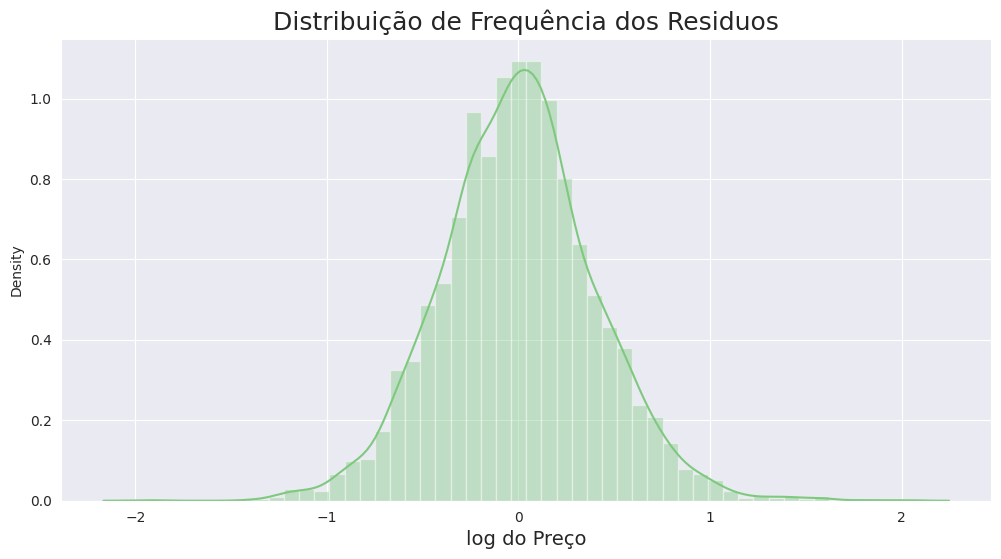

In [ ]:
ax = sns.distplot(residuo)
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequência dos Residuos', fontsize = 18)
ax.set_xlabel('log do Preço', fontsize = 14)
ax

O resíduo deve seguir a frequência comportada de uma normal